## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений
import image

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

In [ ]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

In [ ]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [ ]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [ ]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 5s 4ms/step - loss: 0.2067 - accuracy: 0.9380
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0766 - accuracy: 0.9769
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0486 - accuracy: 0.9844
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0340 - accuracy: 0.9886
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0198 - accuracy: 0.9930
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0155 - accuracy: 0.9948
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0127 - accuracy: 0.9958

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

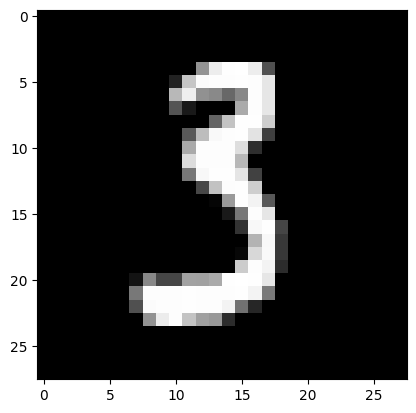

In [ ]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [ ]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 108ms/step


In [ ]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[2.9577045e-19 1.3576207e-13 2.8305990e-13 1.0000000e+00 8.5358716e-19
  1.8641625e-12 3.0995246e-22 1.3958715e-15 4.1087307e-12 1.1482763e-11]]


In [ ]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 3


In [ ]:
import requests

# URL изображения
url = "https://drive.google.com/file/d/1l3SyEr2IzoIrUblsiO7J8p-Oc_QqjTGb/uc?export=download&id=1"

# Скачать изображение
response = requests.get(url)

# Сохранить изображение в локальном файле
with open('image.jpg', 'wb') as f:
    f.write(response.content)


In [ ]:
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing import image

In [ ]:
# URL изображения
url = "https://drive.google.com/uc?id=1l3SyEr2IzoIrUblsiO7J8p-Oc_QqjTGb"

# Скачать изображение
response = requests.get(url)

# Открываем изображение из байтового потока
img = Image.open(BytesIO(response.content))

# Сохраняем изображение локально
img_path = '/content/image.jpg'
img.save(img_path)

# Загрузка изображения с помощью Keras
loaded_img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')


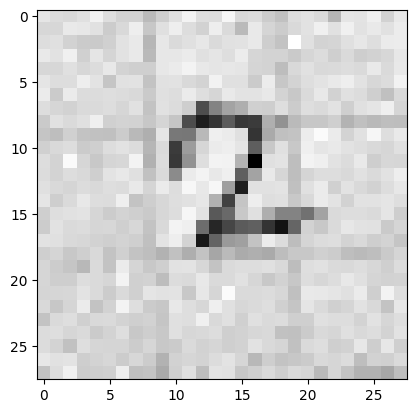

In [ ]:
plt.imshow(loaded_img, cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
loaded_img_array = image.img_to_array(loaded_img)

print("Размер массива numpy:", loaded_img_array.shape)

Размер массива numpy: (28, 28, 1)


In [ ]:
# Инвертируем цвета
inverted_img_array = 255 - loaded_img_array

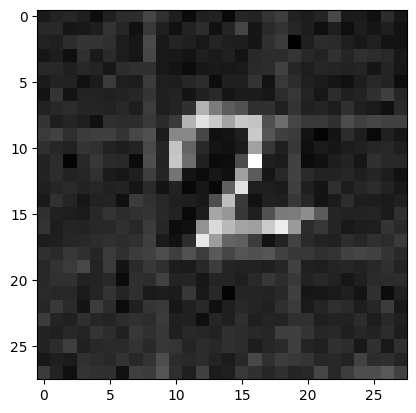

In [ ]:
plt.imshow(inverted_img_array, cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
print("Размер массива numpy после преобразования:", inverted_img_array.shape)

Размер массива numpy после преобразования: (28, 28, 1)


In [ ]:
# Изменяем форму массива на одномерный массив
reshaped_img_array = inverted_img_array.reshape((1, 784))

print("Размер массива numpy после преобразования:", reshaped_img_array.shape)

Размер массива numpy после преобразования: (1, 784)


In [ ]:
normalized_img_array = reshaped_img_array.astype('float32') / 255.

In [ ]:
my_prediction = model.predict(normalized_img_array)

1/1 [==============================] - 0s 18ms/step


In [ ]:
my_pred = np.argmax(my_prediction)
print(f'Распознана цифра: {my_pred}')

Распознана цифра: 2
